# Summary 

In this notebook I demonstrate:

1. Loading data from Quandl
2. Aligning the time periods of two datasets 
3. Comparing two time series together and see if they are related. 

In [1]:
%pylab inline
import Quandl
import os
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
token = os.getenv('QUANDL_TOKEN')
employment_rate = Quandl.get('FRED/EMRATIO', authtoken=token)

In [25]:
profits = pd.read_excel('/Users/Will/Data/econ/profits_gdp.xls')

In [68]:
profits.head()

,observation_date,CP_GDP
0,1947-01-01,0.090086
1,1947-04-01,0.084044
2,1947-07-01,0.081967
3,1947-10-01,0.085670
4,1948-01-01,0.088655


In [7]:
employment_rate.head()

,VALUE
DATE,
1948-01-01,56.6
1948-02-01,56.7
1948-03-01,56.1
1948-04-01,56.7
1948-05-01,56.2


In [44]:
employment_rate = employment_rate.resample('QS', how=np.mean)

In [45]:
df = pd.merge(profits, employment_rate, left_on='observation_date', right_index=True)

In [46]:
df = df.set_index('observation_date')

In [50]:
df.columns = ['c_profits', 'employment_rate']

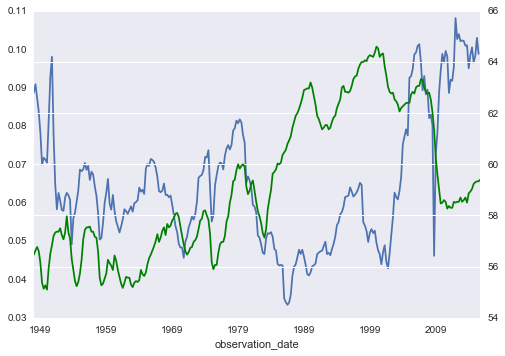

In [52]:
df.c_profits.plot()
df.employment_rate.plot(secondary_y=True, style='g')

In [53]:
df.corr()

,c_profits,employment_rate
c_profits,1.000000,-0.120291
employment_rate,-0.120291,1.000000


In [65]:
correlations = pd.rolling_corr(df, 30, pairwise=True)

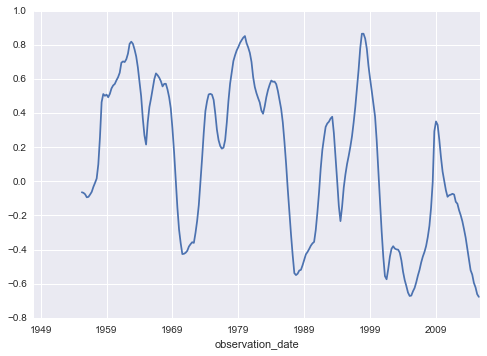

In [67]:
plt.xlim = ['1959', '2014']
correlations.ix[:, 'c_profits', 'employment_rate'].plot()

In [69]:
df.to_csv('cleaned_df.csv')

# Sources

- [Corporate Profits ](https://research.stlouisfed.org/fred2/graph/?g=cSh#)
- [Employment RAtio](https://research.stlouisfed.org/fred2/series/EMRATIO)
- TEsting Time series http://stats.stackexchange.com/questions/19103/how-to-statistically-compare-two-time-series